In [1]:
###: Importing H2O Library

In [2]:
import h2o

In [3]:
### : Initializing h2O

In [4]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 9 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_avkashchauhan_8r3asb
H2O cluster total nodes:,1
H2O cluster free memory:,3.263 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [5]:
### : Getting H2O Cluster status

In [6]:
h2o.cluster().show_status(True)

H2O cluster uptime:,2 hours 9 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,26 days
H2O cluster name:,H2O_from_python_avkashchauhan_8r3asb
H2O cluster total nodes:,1
H2O cluster free memory:,3.263 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


Nodes info:,Node 1
h2o,/127.0.0.1:54321
healthy,True
last_ping,1510858397615.0000000
num_cpus,8
sys_load,2.1069336
mem_value_size,12555264
free_mem,3503644672.0000000
pojo_mem,301664256
swap_mem,0
free_disk,223772409856.0000000


In [7]:
###: Importing Dataset

In [8]:
df = h2o.import_file("/Users/avkashchauhan/src/github.com/avkash/mldl/data/auto_mpg.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
###: Understanding Dataset

In [10]:
df.describe()

Rows:398
Cols:8




,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
type,int,real,int,int,real,int,int,real
mins,3.0,68.0,46.0,1613.0,8.0,70.0,1.0,9.0
mean,5.45477386935,193.425879397,104.469387755,2970.42462312,15.5680904523,76.0100502513,1.57286432161,23.5145728643
maxs,8.0,455.0,230.0,5140.0,24.8,82.0,3.0,46.6
sigma,1.70100424453,104.269838171,38.4911599328,846.841774197,2.75768892981,3.69762664673,0.802054877727,7.81598431257
zeros,0,0,0,0,0,0,0,0
missing,0,0,6,0,0,0,0,0
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,18.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,15.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,18.0


In [11]:
###: Getting a list of columns in our dataset

In [12]:
df.col_names

[u'cylinders',
 u'displacement',
 u'horsepower',
 u'weight',
 u'acceleration',
 u'modelyear',
 u'origin',
 u'mpg']

In [13]:
###: Understanding Dataset with pylab library

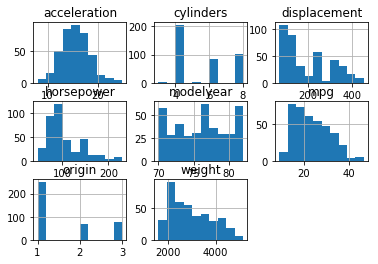

In [14]:
import pylab as pl
pl.figure(figsize=(20,10))
df.as_data_frame().hist()
pl.show()

In [15]:
###: Understanding Dataset with Seaborn python library using origin as color hue

/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/avkashchauhan/anaconda3/envs/python27/lib/python2.7/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


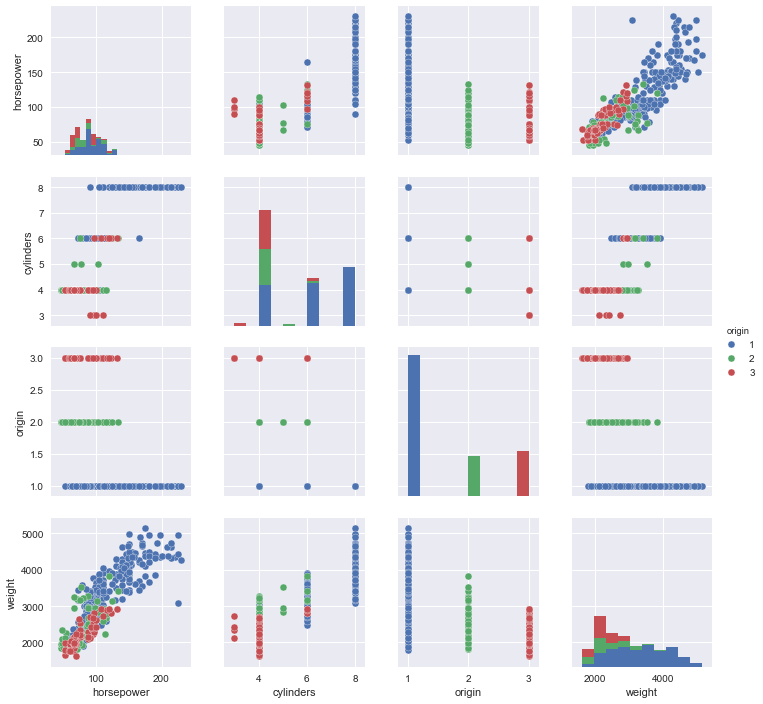

In [16]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 12)

import seaborn as sns
sns.set_context("notebook")

sns.pairplot(df.as_data_frame(), vars=["horsepower" , "cylinders", "origin", "weight"], hue="origin");
plt.show()

In [17]:
###: Getting the list of classes in the response column ()

In [18]:
df['cylinders'].asfactor().levels()

[['3', '4', '5', '6', '8']]

In [19]:
###: Understanding Dataset with Seaborn python library using cylinders as color hue

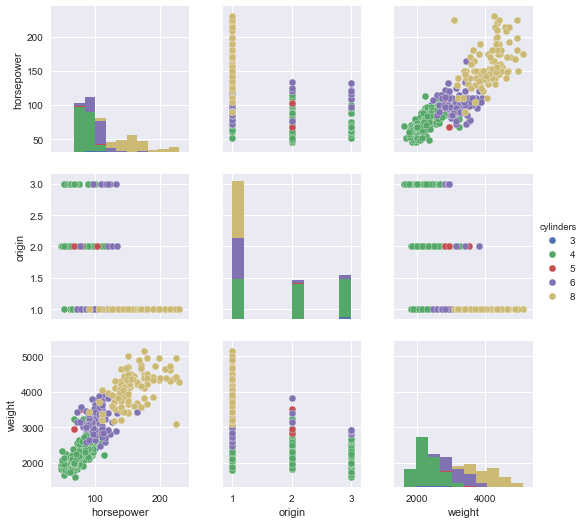

In [20]:
sns.pairplot(df.as_data_frame(), vars=["horsepower" , "origin", "weight"], hue="cylinders");
plt.show()

In [21]:
###: Setting Response column

In [22]:
response = "mpg"

In [23]:
###: Setting all columns/features into a local variable

In [24]:
features = df.col_names

In [25]:
###: Settings all features for model building

In [26]:
features.remove(response)
print(features)

[u'cylinders', u'displacement', u'horsepower', u'weight', u'acceleration', u'modelyear', u'origin']


In [27]:
###: Importing H2O Deep Learning library

In [28]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [30]:
###: Setting H2O Deep Learning model configuration (default)

In [31]:
dl_auto_basic = H2ODeepLearningEstimator()

In [32]:
###: Training H2O Deep Learning Model 

In [33]:
dl_auto_basic.train(x = features, y = response, training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [34]:
###: Understanding H2O Deep Learning Model

In [35]:
dl_auto_basic

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1510850632242_50


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 7.58100646405
RMSE: 2.75336275562
MAE: 2.03536825377
RMSLE: 0.109079670701
Mean Residual Deviance: 7.58100646405
Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2017-11-16 11:02:33,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2017-11-16 11:02:33,0.406 sec,1644 obs/sec,1.0,1,398.0,3.1213455,9.7427980,2.2868057
,2017-11-16 11:02:34,0.816 sec,6189 obs/sec,10.0,10,3980.0,2.7533628,7.5810065,2.0353683


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
weight,1.0,1.0,0.1491051
displacement,0.9919012,0.9919012,0.1478976
modelyear,0.9856502,0.9856502,0.1469655
cylinders,0.9640727,0.9640727,0.1437482
horsepower,0.9607453,0.9607453,0.1432521
acceleration,0.9073324,0.9073324,0.1352879
origin,0.8969752,0.8969752,0.1337436


In [36]:
###: Understanding H2O Deep Learning Model overall performance based on training data

In [37]:
dl_auto_basic.model_performance(train=True)


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 7.58100646405
RMSE: 2.75336275562
MAE: 2.03536825377
RMSLE: 0.109079670701
Mean Residual Deviance: 7.58100646405


In [38]:
###: Understanding H2O Deep Learning Model - r2 Model metrics based on training data

In [39]:
dl_auto_basic.model_performance(train=True).r2()

0.8755909197398568

In [40]:
###: Setting H2O Deep Learning model configuration to use cross validation with 5 folds

In [41]:
dl_auto_cv = H2ODeepLearningEstimator(nfolds = 5)

In [42]:
###: Training H2O Deep Learning Model 

In [43]:
dl_auto_cv.train(x = features, y = response, training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [44]:
dl_auto_cv

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1510850632242_51


ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 33.6881972165
RMSE: 5.80415344529
MAE: 5.20379437925
RMSLE: 0.280672743253
Mean Residual Deviance: 33.6881972165

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 11.9577117798
RMSE: 3.45799244935
MAE: 2.64168293896
RMSLE: 0.133113749259
Mean Residual Deviance: 11.9577117798
Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.6469975,0.0631556,2.6722093,2.6722982,2.7549803,2.4829268,2.6525726
mean_residual_deviance,11.96327,0.2483126,11.811564,12.228558,12.268812,11.34018,12.167237
mse,11.96327,0.2483126,11.811564,12.228558,12.268812,11.34018,12.167237
r2,0.7992982,0.0126221,0.8140280,0.7860948,0.7724146,0.8030986,0.8208551
residual_deviance,11.96327,0.2483126,11.811564,12.228558,12.268812,11.34018,12.167237
rmse,3.4584186,0.0361358,3.4367957,3.4969354,3.5026865,3.3675184,3.4881568
rmsle,0.1333287,0.0083153,0.1284986,0.1288565,0.1554621,0.1207525,0.1330738


Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
,2017-11-16 11:02:37,0.000 sec,None,0.0,0,0.0,nan,nan,nan
,2017-11-16 11:02:37,2.692 sec,5116 obs/sec,0.9899497,1,394.0,4.9427961,24.4312333,3.7898437
,2017-11-16 11:02:37,3.225 sec,6990 obs/sec,10.5552764,10,4201.0,5.8041534,33.6881972,5.2037944


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
weight,1.0,1.0,0.1513504
modelyear,0.9927492,0.9927492,0.1502530
origin,0.9867641,0.9867641,0.1493471
displacement,0.9465899,0.9465899,0.1432667
acceleration,0.9251090,0.9251090,0.1400156
horsepower,0.8783220,0.8783220,0.1329344
cylinders,0.8776505,0.8776505,0.1328327


In [45]:
###: Understanding H2O Deep Learning Model overall performance based on training data (r2 only)

In [46]:
dl_auto_cv.model_performance(train=True).r2()

0.4471555127671989

In [47]:
###: Understanding H2O Deep Learning Model overall performance based on cross validation data (r2 only)

In [48]:
dl_auto_cv.model_performance(xval=True).r2()

0.8037664350255854

In [49]:
###: Understanding H2O Deep Learning Model scoring History

In [50]:
dl_auto_cv.score_history()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae
0,,2017-11-16 11:02:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN
1,,2017-11-16 11:02:37,2.692 sec,5116 obs/sec,0.989950,1,394.0,4.942796,24.431233,3.789844
2,,2017-11-16 11:02:37,3.225 sec,6990 obs/sec,10.555276,10,4201.0,5.804153,33.688197,5.203794


In [51]:
###: Understanding H2O Deep Learning Model variable importance

In [52]:
dl_auto_cv.varimp()

[(u'weight', 1.0, 1.0, 0.15135039130207528),
 (u'modelyear', 0.9927492141723633, 0.9927492141723633, 0.1502529820298149),
 (u'origin', 0.986764132976532, 0.986764132976532, 0.14934713764885116),
 (u'displacement',
  0.9465898871421814,
  0.9465898871421814,
  0.14326674982155643),
 (u'acceleration', 0.9251090288162231, 0.9251090288162231, 0.1400156135084182),
 (u'horsepower', 0.8783220052719116, 0.8783220052719116, 0.13293437918712725),
 (u'cylinders', 0.8776504993438721, 0.8776504993438721, 0.1328327465021568)]

In [53]:
###: Generating H2O Deep Learning Model variable importance plot

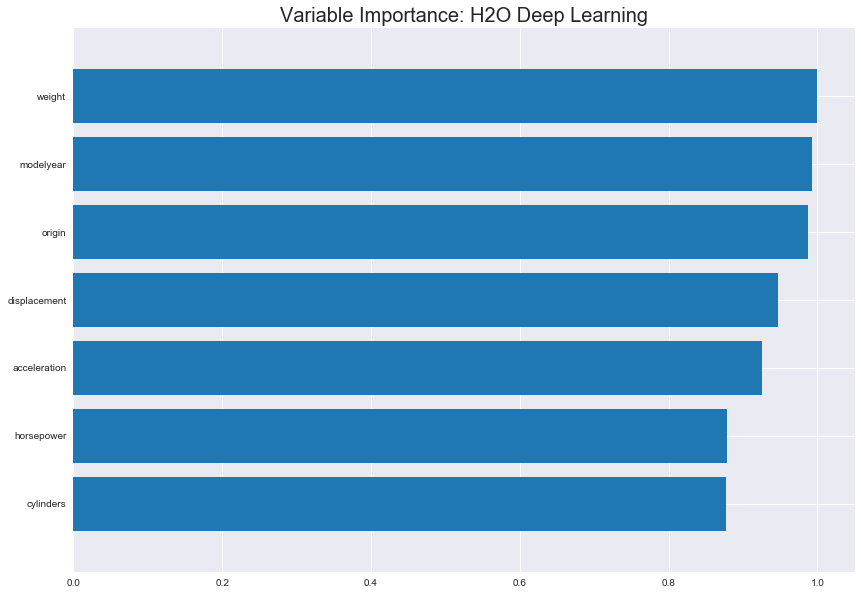

In [54]:
dl_auto_cv.varimp_plot()

In [55]:
###: Setting H2O Deep Learning model configuration to use cross validation with 5 folds and various other parameters
###: for tuning the performance and accuracy

In [56]:
dl_auto_cv_tuned = H2ODeepLearningEstimator(nfolds = 5,
                                           hidden = [10,10],
                                           epochs = 25,
                                           train_samples_per_iteration=10,
                                           score_training_samples=20,
                                           activation="Rectifier",
                                           adaptive_rate = False)
# default activation works best this data #
# adaptive_rate = False works best for this data #

In [57]:
###: Training H2O Deep Learning Model 

In [58]:
dl_auto_cv_tuned.train(x = features , y = response, training_frame=df)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [59]:
###: Understanding H2O Deep Learning Model overall performance based on cross validation data (r2 only)

In [60]:
dl_auto_cv_tuned.model_performance(xval=True).r2()

0.8484913891933124

In [61]:
###: Plotting H2O Deep Learning Model performance based on mae metric

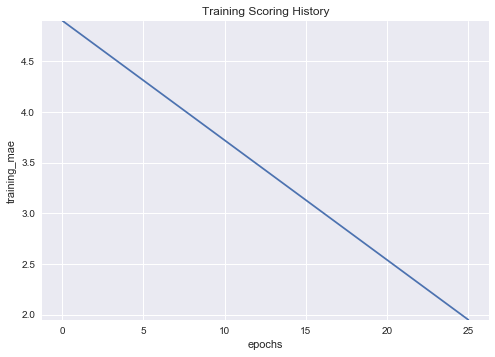

In [62]:
dl_auto_cv_tuned.plot(metric="mae")

In [63]:
###: Plotting H2O Deep Learning Model performance based on rmse metric

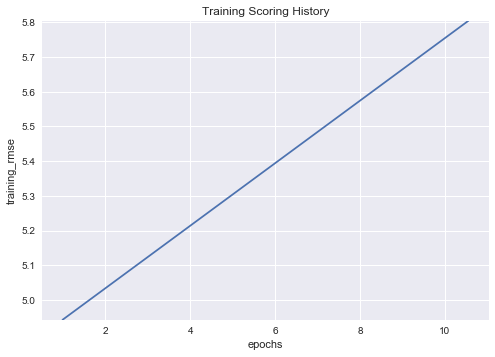

In [64]:
dl_auto_cv.plot(metric='rmse')

In [65]:
###: Plotting H2O Deep Learning Model variable importance plot

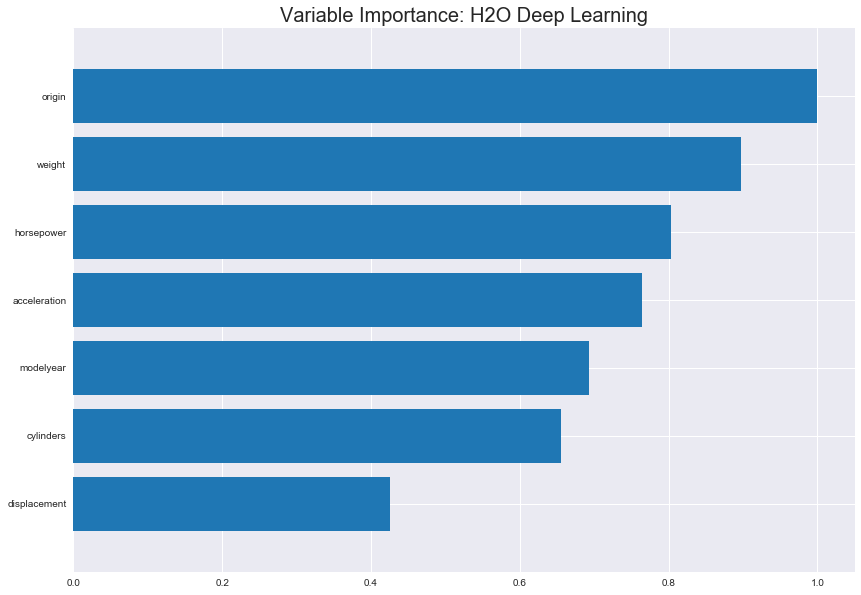

In [66]:
dl_auto_cv_tuned.varimp_plot()

In [67]:
###: Comparing H2O Deep Learning Model performance based on tuned and default cross validation model

In [68]:
print(dl_auto_cv_tuned.model_performance(xval=True).r2())
print(dl_auto_cv_tuned.model_performance(train=True).r2())

0.848491389193
0.91098764454


In [69]:
### PERFORMING PREDICTIONS USING a TEST DATA SET

In [70]:
###: listing first 3 rows from the original data set

In [71]:
df.head(3)

cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,mpg
8,307,130,3504,12,70,1,18
8,350,165,3693,11.5,70,1,15
8,318,150,3436,11,70,1,18


In [72]:
###: listing original data set columns

In [73]:
df.columns_by_type()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [74]:
###: creating test data set based on features used for building model

In [75]:
df_test = h2o.H2OFrame.from_python({"cylinders":11, "displacement" : 400, "horsepower" : 400, 
                                    "weight" : 2000, "acceleration" : 14, "modelyear" : 90,
                                   "origin" : 2})

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [76]:
###: Performing prediction using one of the best deep learning model we built earlier

In [77]:
dl_auto_cv_tuned.predict(df_test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict
18.735
